In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import time
from IPython.display import display, clear_output
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline, splrep, splev
import scipy.signal

In [86]:
Files = glob.glob("*EC.txt")
Open_Files = []
for file in range(len(Files)):
    Temp_file = open(Files[file],'r')
    for i in Temp_file:
        Open_Files.append(i.strip("())\n"))
    Temp_file.close()
for line in range(len(Open_Files)):
    Open_Files[line] = Open_Files[line].split(',')
Open_Files = np.array([np.array(i).astype(float) for i in Open_Files])

Emissions = []
for i in Files:
    Emissions.append(int(i[-10:-6].strip("_")))
print(Emissions)

[25, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400]


In [87]:
Iterator = int(len(Open_Files)/len(Files))
print(Iterator)
All_Emissions = np.zeros([len(Files),Iterator,2])
for i in range(len(Files)):
    All_Emissions[i] = Open_Files[Iterator*i:Iterator*(i+1)]

166


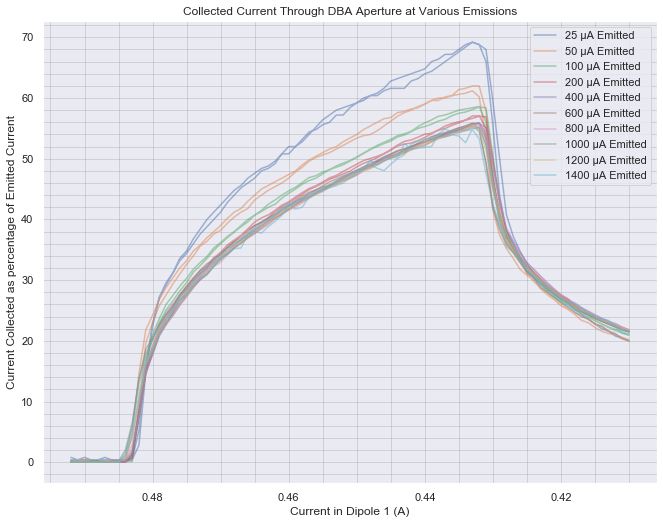

In [88]:
plt.figure(figsize = (11,8.5))
view_list = range(len(All_Emissions))
#view_list = [0]
for run in view_list:
    #plt.scatter(All_Emissions[run,:,0],100*abs(All_Emissions[run,:,1]/max(abs(All_Emissions[run,:,1]))),label = "{} \u03BCA Emitted".format(Emissions[run]))
    plt.plot(All_Emissions[run,:,0],100*1000*abs(All_Emissions[run,:,1]/Emissions[run]),label = "{} \u03BCA Emitted".format(Emissions[run]),alpha = 0.5)
plt.minorticks_on()
plt.grid(True,alpha = 0.25,which = 'both',color = 'gray')
plt.legend()
plt.title("Collected Current Through DBA Aperture at Various Emissions")
#plt.xlim(.475,.480)
#plt.ylim(-5,10)
plt.xlabel("Current in Dipole 1 (A)")
plt.ylabel("Current Collected as percentage of Emitted Current")
plt.gca().invert_xaxis()
#plt.savefig("DP1_Results.svg",transparent = True)

In [89]:
All_Emissions_Avg = np.zeros([len(Files),int([i-1 if i%2 != 0 else i for i in [Iterator]][0]/2),2])

for num,k in enumerate(All_Emissions):
    for i in range(int(len(k)/2)):
        for j in range(int(len(k)/2)):
            #if np.shape(All_Emissions)[1] %2 != 0:
            if k[i,0] == k[j,0]:
                All_Emissions_Avg[num,i] = (([k[i,0],(k[i,1]+k[j,1])/2]))

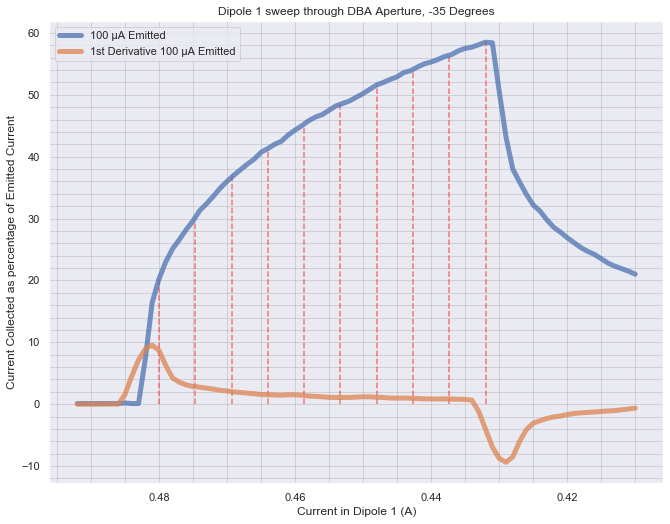

In [90]:
plt.gcf().set_size_inches(11, 8.5)
view_list = range(len(All_Emissions_Avg))
view_list = [2]

for run in view_list:
    x_data = All_Emissions_Avg[run,:,0]
    plt.plot(x_data,1e5*abs(All_Emissions_Avg[run,:,1]/Emissions[run]),label = "{} \u03BCA Emitted".format(Emissions[run]),alpha = 0.75,linewidth = 5)
    x = np.linspace(min(x_data),max(x_data),len(All_Emissions_Avg[run,:,0]))
    y = 1e7*abs(All_Emissions_Avg[run,:,1])
    #derivative = splrep(x,y,k=5,s=1e6)
    x_plot = np.linspace(max(x_data),min(x_data),len(All_Emissions_Avg[run,:,0]))
    #plt.plot(x_plot, splev(x,derivative,der=1)/1e5, label="Derivative {} \u03BCA Emitted".format(Emissions[run]))
    
    dydx = scipy.signal.savgol_filter(y, window_length=7, polyorder=2, deriv=1)
    plt.plot(x_plot, dydx*2e-4, label="1st Derivative {} \u03BCA Emitted".format(Emissions[run]),linewidth = 5,alpha = 0.75)
    
plt.minorticks_on()
plt.grid(True,alpha = 0.25,which = 'both',color = 'gray')
plt.legend()
plt.title("Dipole 1 sweep through DBA Aperture, -35 Degrees")
#plt.xlim(.41,.492)
#plt.hlines(0,1,0,alpha = 0.25)

x_mindex = np.where(All_Emissions_Avg[run,:,1] == min(All_Emissions_Avg[run,:,1]))[0][0]
x_maxdex = 0.480
for i in np.linspace(All_Emissions_Avg[run,x_mindex,0],x_maxdex,10):
    index = np.where(All_Emissions_Avg[run,:,0] == round(i,3))[0][0]
    plt.vlines(i,0,1e5*abs(All_Emissions_Avg[run,index,1]/Emissions[run]),alpha = 0.5,color = 'red',linestyle = '--')
    
#plt.ylim(-19,55)
plt.xlabel("Current in Dipole 1 (A)")
plt.ylabel("Current Collected as percentage of Emitted Current")
plt.gca().invert_xaxis()
plt.savefig("DP1_Results_35.png",transparent = True,orientation = 'landscape',bbox_inches = 'tight',dpi = 600)

# Running at -35 Degrees

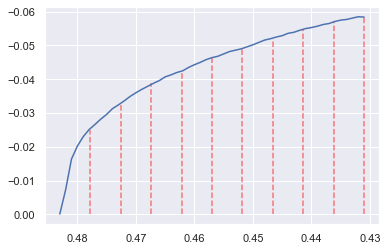

In [94]:
Bad_Data_Numerator_Start = 9
Bad_Data_Numerator_End = -21
Data_Set = 2 #100 uA Emitted
X_100 = All_Emissions_Avg[Data_Set,Bad_Data_Numerator_Start:Bad_Data_Numerator_End,0]
Y_100 = All_Emissions_Avg[Data_Set,Bad_Data_Numerator_Start:Bad_Data_Numerator_End,1]
plt.plot(X_100,Y_100)
Y_mms = []
for i in np.linspace(X_100[0],X_100[-1],11):
    index = np.where(X_100 == round(i,3))[0][0]
    plt.vlines(i,0,Y_100[index],alpha = 0.5,color = 'red',linestyle = '--')
    #Y_mms.append(sum(Y_100[:index+1]))
    Y_mms.append(Y_100[index])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

for num,i in enumerate(Y_mms):
    if num == 1:
        print("{1:.1f}% of emitted beam through at {0:.0f} mm through the aperture".format(num,-1e3*100*i/Emissions[Data_Set]))
    else:
        print("{1:.1f}% of emitted beam through at {0:.0f} mm's through the aperture".format(num,-1e3*100*i/Emissions[Data_Set]))

In [99]:
for num,i in enumerate(Y_mms):
    if num == 1:
        print("{1:.1f}% of emitted beam through at {0:.0f} mm through the aperture".format(num,-1e3*100*i/Emissions[Data_Set]))
    else:
        print("{1:.1f}% of emitted beam through at {0:.0f} mm's through the aperture".format(num,-1e3*100*i/Emissions[Data_Set]))

0.1% of emitted beam through at 0 mm's through the aperture
25.1% of emitted beam through at 1 mm through the aperture
32.4% of emitted beam through at 2 mm's through the aperture
38.8% of emitted beam through at 3 mm's through the aperture
42.5% of emitted beam through at 4 mm's through the aperture
46.4% of emitted beam through at 5 mm's through the aperture
49.0% of emitted beam through at 6 mm's through the aperture
52.0% of emitted beam through at 7 mm's through the aperture
55.0% of emitted beam through at 8 mm's through the aperture
57.1% of emitted beam through at 9 mm's through the aperture
58.4% of emitted beam through at 10 mm's through the aperture
